In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import sklearn
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split

Matplotlib is building the font cache; this may take a moment.


In [57]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [3]:
df=pd.read_csv('olx_car_data_prediction')
df

,Brand,Year,KMT,Fuel,Owners,Price
0,Skoda Superb,2010,86000.0,PETROL,3rd,295000
1,Maruti Suzuki Alto K10,2014,32000.0,PETROL,1st,320000
2,Volkswagen Polo,2014,74000.0,PETROL,1st,455000
3,Tata Indica Ev2,2007,30000,DIESEL,Third,75000
4,Tata Safari,2009,90000,DIESEL,Third,155555
...,...,...,...,...,...,...
2245,Audi A4,2011,91690.0,DIESEL,2nd,775000
2246,Hyundai Fluidic Verna,2016,60000.0,PETROL,1st,565000
2247,Hyundai Verna,2018,26000.0,PETROL,1st,945000
2248,Hyundai I10,2014,81352.0,PETROL,--,245000


In [4]:
df.shape

(2250, 6)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2250 entries, 0 to 2249
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Brand   2250 non-null   object
 1   Year    2250 non-null   object
 2   KMT     2250 non-null   object
 3   Fuel    2250 non-null   object
 4   Owners  2250 non-null   object
 5   Price   2250 non-null   object
dtypes: object(6)
memory usage: 105.6+ KB


In [6]:
df.isnull().sum()

Brand     0
Year      0
KMT       0
Fuel      0
Owners    0
Price     0
dtype: int64

<AxesSubplot:>

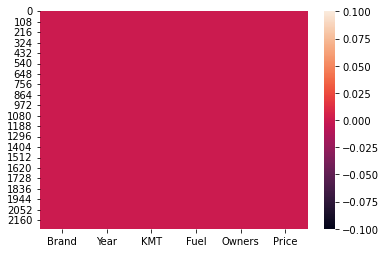

In [7]:
sns.heatmap(df.isnull())

In [8]:
df['Brand'].unique()

array(['Skoda Superb', 'Maruti Suzuki Alto K10', 'Volkswagen Polo',
       'Tata Indica Ev2', 'Tata Safari', 'Honda City', 'Hyundai Santro',
       'Tata Sumo', 'Mahindra Xylo', 'Mahindra Bolero',
       'Maruti Suzuki Alto', 'Renault Duster', 'Hyundai Creta',
       'Maruti Suzuki Baleno Rs', 'Maruti Suzuki 800', 'Mahindra Xuv500',
       'Mercedes-Benz E-Class', 'Jeep Compass', 'Maruti Suzuki Ciaz',
       'Ford Aspire', 'Maruti Suzuki Swift', ' ', 'Tata Indica V2',
       'Hyundai Accent', 'Volkswagen Vento',
       'Maruti Suzuki Vitara Brezza', 'Toyota Etios', 'Tata Altroz',
       'Ford Ecosport', 'Skoda Rapid', 'Maruti Suzuki Swift Dzire',
       'Audi A4', 'Hyundai Fluidic Verna', 'Hyundai Verna', 'Hyundai I10',
       'Maruti Suzuki Baleno'], dtype=object)

In [9]:
df['Brand'].value_counts()

Maruti Suzuki Ciaz             167
Honda City                     113
Maruti Suzuki Alto K10         113
Volkswagen Vento               112
Tata Indica Ev2                 57
Volkswagen Polo                 57
Hyundai Santro                  57
Tata Sumo                       57
Mahindra Bolero                 57
Tata Altroz                     56
Hyundai Fluidic Verna           56
Maruti Suzuki Vitara Brezza     56
Hyundai Accent                  56
Tata Indica V2                  56
Maruti Suzuki Swift             56
Ford Aspire                     56
Toyota Etios                    56
Hyundai Verna                   56
Mercedes-Benz E-Class           56
Mahindra Xuv500                 56
Hyundai Creta                   56
Renault Duster                  56
Maruti Suzuki Alto              56
Mahindra Xylo                   56
Tata Safari                     56
Ford Ecosport                   56
Maruti Suzuki Swift Dzire       55
Audi A4                         55
Hyundai I10         

In [10]:
df['Year'].value_counts()

2014    338
2016    334
2017    224
2015    169
2011    167
2010    167
2018    164
2006    113
2012    113
2009    112
2007     57
2013     56
2021     56
2019     55
2003     55
2008     55
         15
Name: Year, dtype: int64

In [11]:
df['KMT'].unique()

array(['86000.0', '32000.0', '74000.0', '30000', '90000', '68000.0',
       '100000.0', '77000.0', '88,000', '128,541', '99416.0', '39800.0',
       '40,000', '53,000', '78570.0', '42000.0', '65400.0', '60000.0',
       '52746.0', '53000.0', '37000.0', ' ', '200000', '120000',
       '50000.0', '78000.0', '74286.0', '90000.0', '83000.0', '12000.0',
       '80000.0', '33000.0', '25000.0', '91690.0', '26000.0', '81352.0',
       '113222.0', '55736', '90,000', '86,000', '99,416', '65,400',
       '91,690', '83,000', '32,000', '52,746'], dtype=object)

In [12]:
df['KMT'] = df['KMT'].str.replace(r',','')

In [14]:
df['KMT']

0        86000.0
1        32000.0
2        74000.0
3          30000
4          90000
          ...   
2245     91690.0
2246     60000.0
2247     26000.0
2248     81352.0
2249    113222.0
Name: KMT, Length: 2250, dtype: object

In [15]:
df['KMT'].unique

<bound method Series.unique of 0        86000.0
1        32000.0
2        74000.0
3          30000
4          90000
          ...   
2245     91690.0
2246     60000.0
2247     26000.0
2248     81352.0
2249    113222.0
Name: KMT, Length: 2250, dtype: object>

In [17]:
df['Owners'] = df['Owners'].replace(['First'],'1st')
df['Owners'] = df['Owners'].replace(['Second'],'2nd')

In [18]:
df['Owners'].value_counts()

1st       1115
2nd        616
3rd        224
Third      113
--         111
Fourth      56
            15
Name: Owners, dtype: int64

# Visualisation 

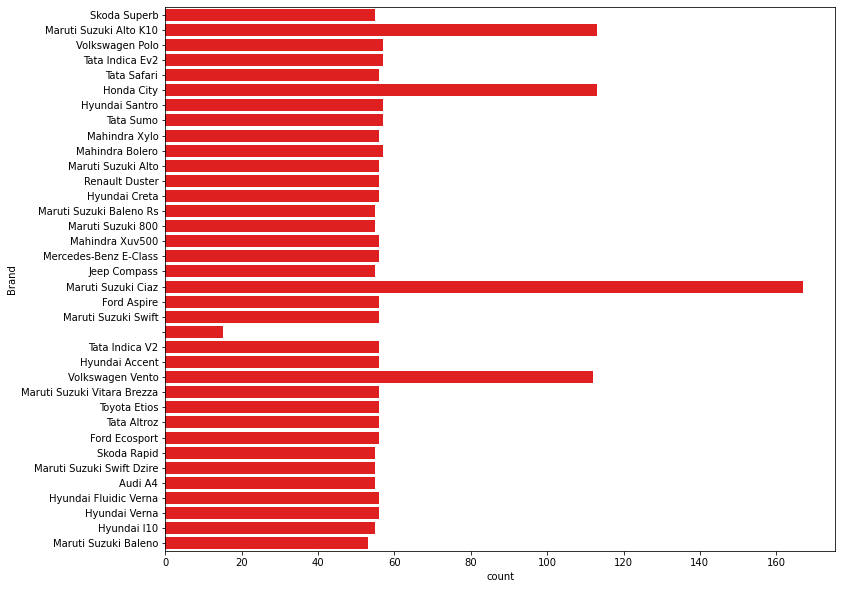

In [19]:
plt.figure(figsize=(12,10))
sns.countplot(y='Brand',data=df,color='red')
plt.show()

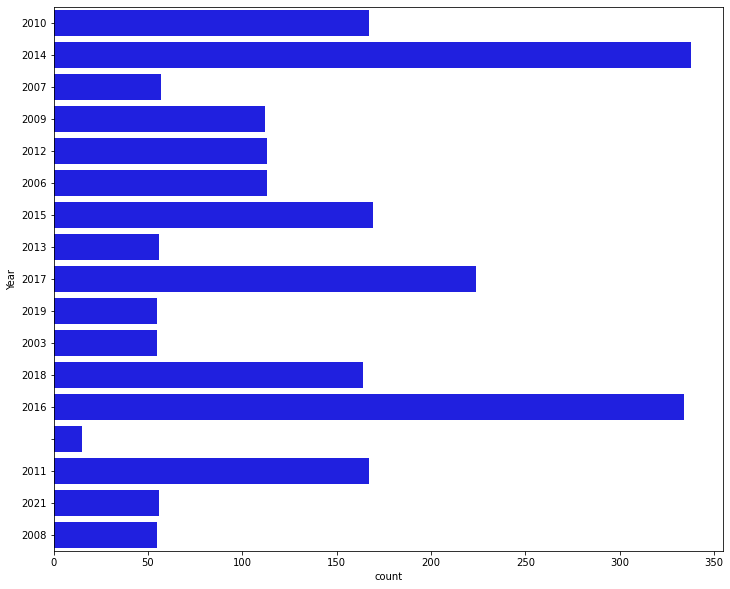

In [20]:
plt.figure(figsize=(12,10))
sns.countplot(y='Year',data=df,color='blue')
plt.show()

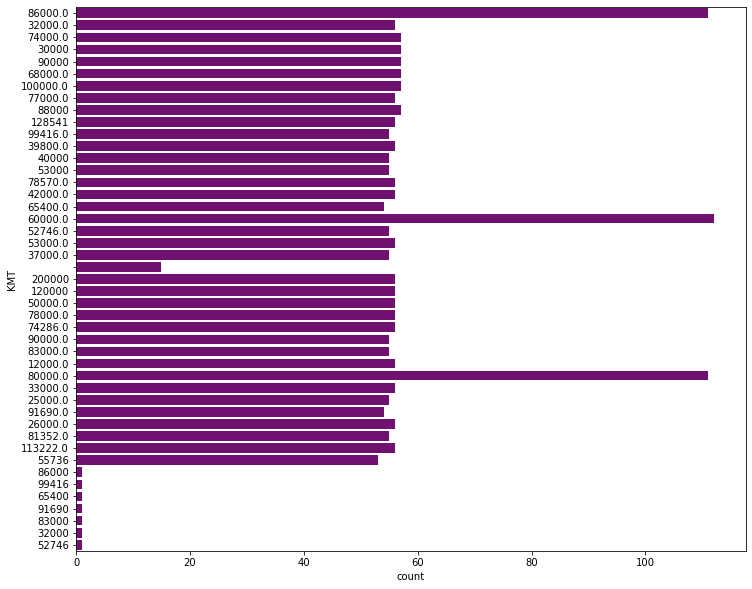

In [21]:
plt.figure(figsize=(12,10))
sns.countplot(y='KMT',data=df,color='purple')
plt.show()

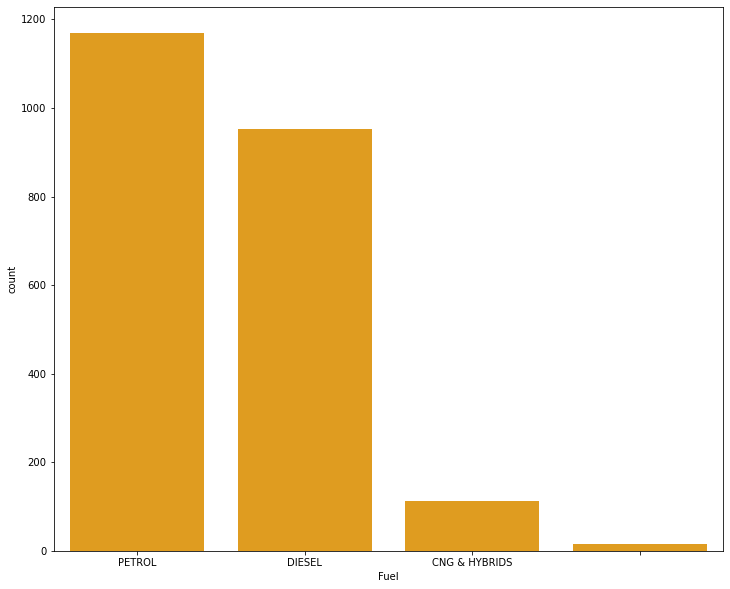

In [22]:
plt.figure(figsize=(12,10))
sns.countplot(x='Fuel',data=df,color='orange')
plt.show()

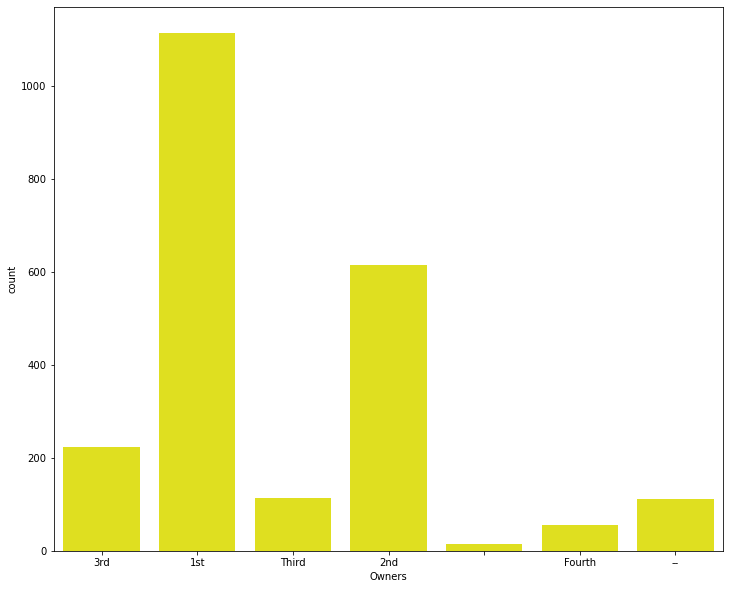

In [23]:
plt.figure(figsize=(12,10))
sns.countplot(x='Owners',data=df,color='yellow')
plt.show()

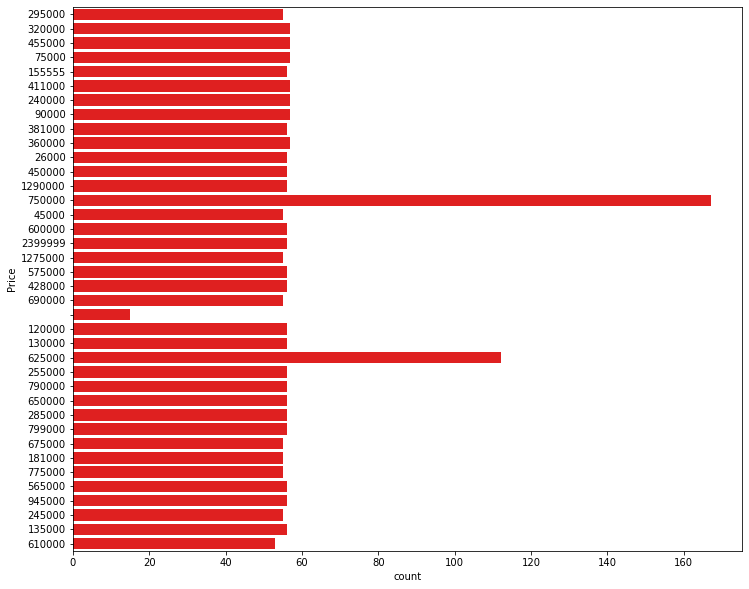

In [24]:
plt.figure(figsize=(12,10))
sns.countplot(y='Price',data=df,color='red')
plt.show()

<Figure size 1800x1296 with 0 Axes>

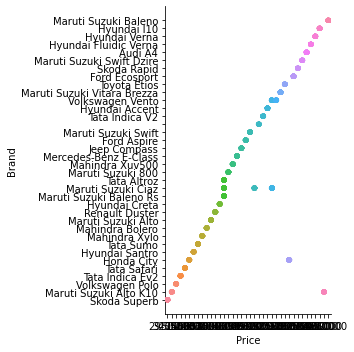

In [25]:
plt.figure(figsize=(25,18))
sns.catplot('Price','Brand',data=df)
plt.show()

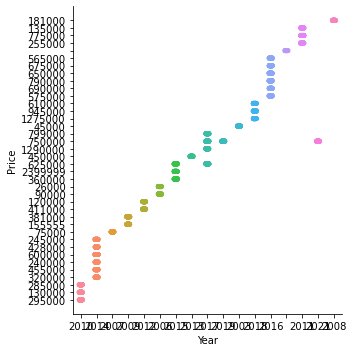

In [26]:
sns.catplot('Year','Price',data=df)

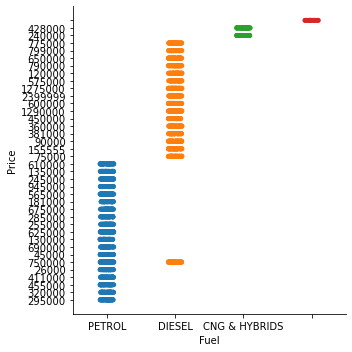

In [27]:
sns.catplot('Fuel','Price',data=df)

# Encoding

In [28]:
from sklearn.preprocessing import OrdinalEncoder
Ord_enc= OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes =='object':
        df[i] = Ord_enc.fit_transform(df[i].values.reshape(-1,1))

In [29]:
from sklearn.preprocessing import LabelEncoder
Lab_enc=LabelEncoder()
df['Fuel']=Lab_enc.fit_transform(df['Fuel'])
df['Owners']= Lab_enc.fit_transform(df['Owners'])

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2250 entries, 0 to 2249
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Brand   2250 non-null   float64
 1   Year    2250 non-null   float64
 2   KMT     2250 non-null   float64
 3   Fuel    2250 non-null   int64  
 4   Owners  2250 non-null   int64  
 5   Price   2250 non-null   float64
dtypes: float64(4), int64(2)
memory usage: 105.6 KB


<AxesSubplot:xlabel='Fuel', ylabel='Price'>

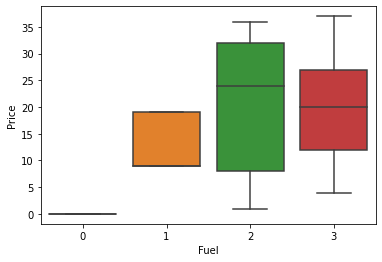

In [31]:
sns.boxplot('Fuel','Price',data=df)

<AxesSubplot:xlabel='Fuel', ylabel='Price'>

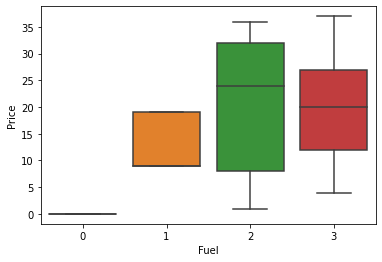

In [32]:
sns.boxplot('Fuel','Price',data=df)

<AxesSubplot:xlabel='Year', ylabel='KMT'>

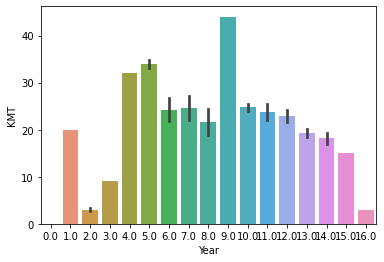

In [33]:
sns.barplot('Year','KMT',data=df)

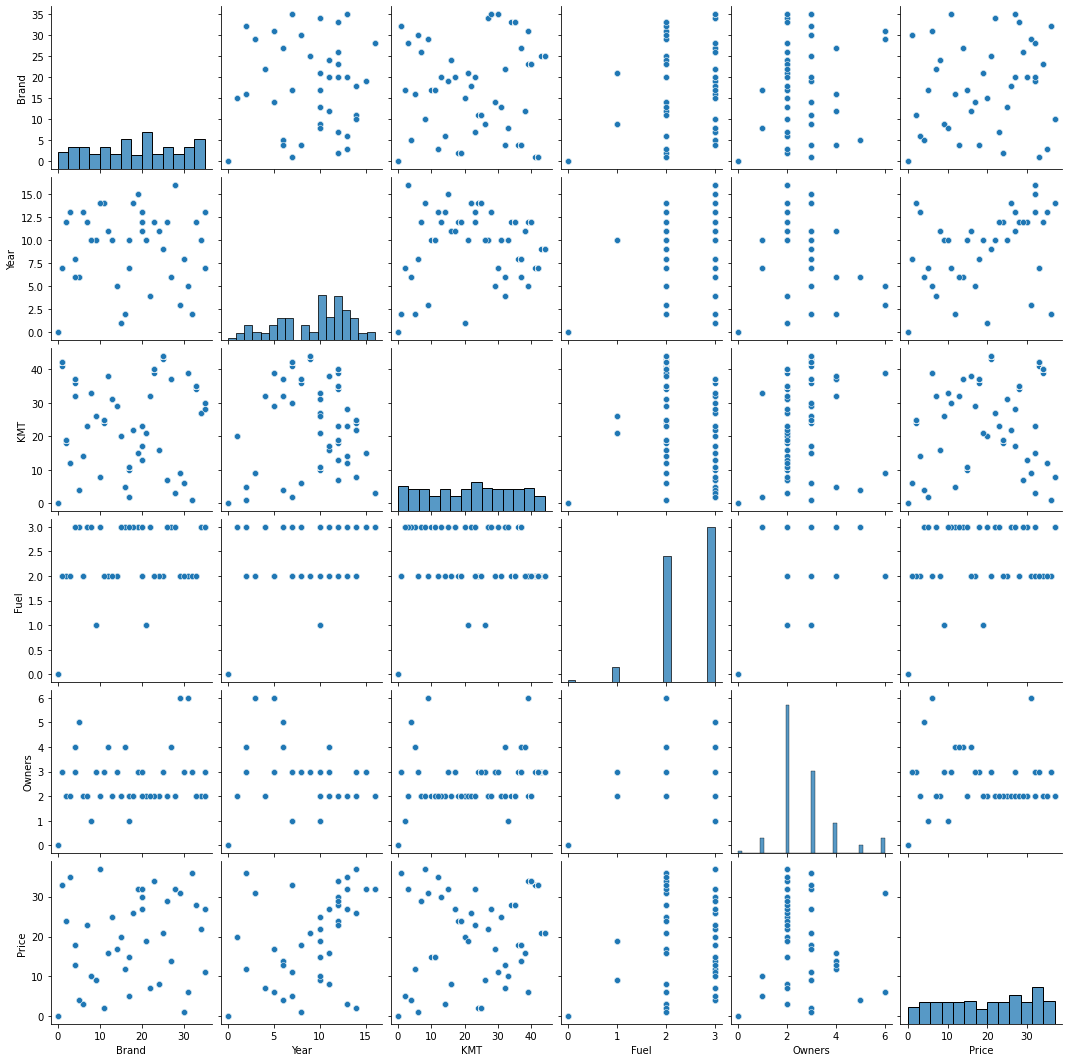

In [34]:
sns.pairplot(df)

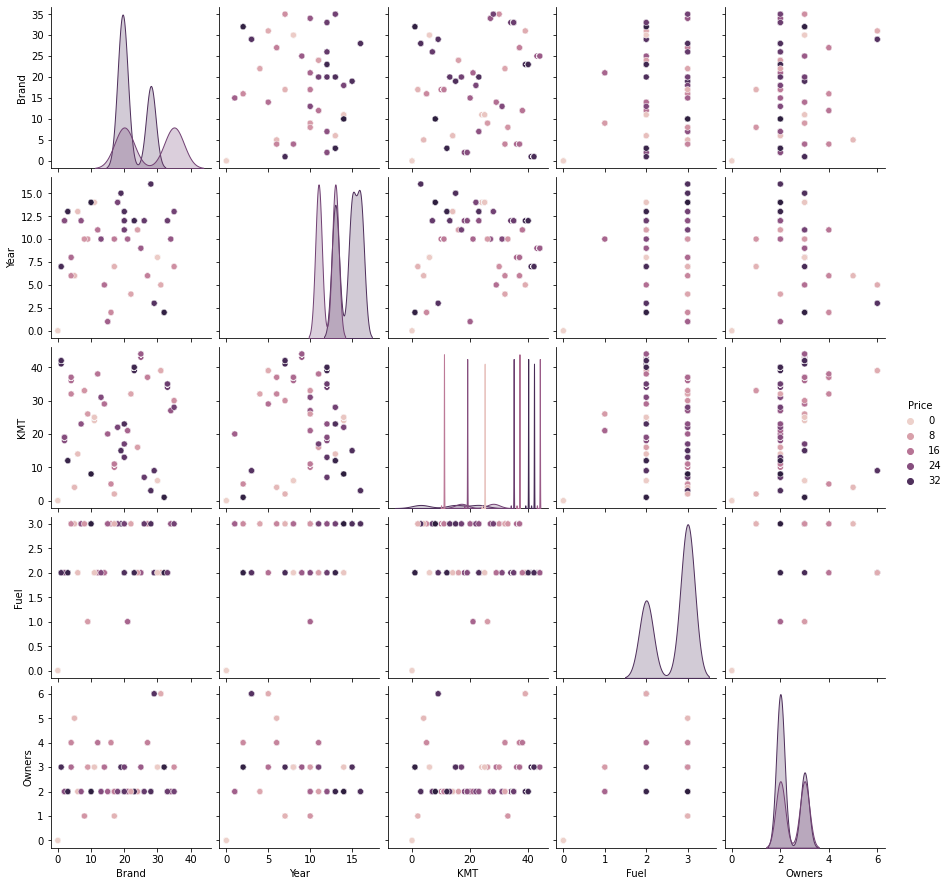

In [35]:
sns.pairplot(df,hue='Price')

In [36]:
df.describe()

,Brand,Year,KMT,Fuel,Owners,Price
count,2250.000000,2250.000000,2250.000000,2250.000000,2250.000000,2250.000000
mean,18.040000,9.327556,21.736444,2.456000,2.685778,19.713778
std,10.172247,3.885969,12.475903,0.623443,1.142736,10.799183
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.000000,6.000000,11.000000,2.000000,2.000000,10.000000
50%,18.000000,10.000000,22.000000,3.000000,2.000000,20.000000
75%,26.000000,12.000000,32.000000,3.000000,3.000000,29.000000
max,35.000000,16.000000,44.000000,3.000000,6.000000,37.000000


# Corelation

In [37]:
df.corr()

,Brand,Year,KMT,Fuel,Owners,Price
Brand,1.000000,-0.068003,-0.015995,0.093808,0.113235,0.124294
Year,-0.068003,1.000000,0.005276,0.037060,-0.435809,0.321180
KMT,-0.015995,0.005276,1.000000,-0.135690,0.116946,-0.040579
Fuel,0.093808,0.037060,-0.135690,1.000000,-0.053430,0.080285
Owners,0.113235,-0.435809,0.116946,-0.053430,1.000000,-0.158981
Price,0.124294,0.321180,-0.040579,0.080285,-0.158981,1.000000


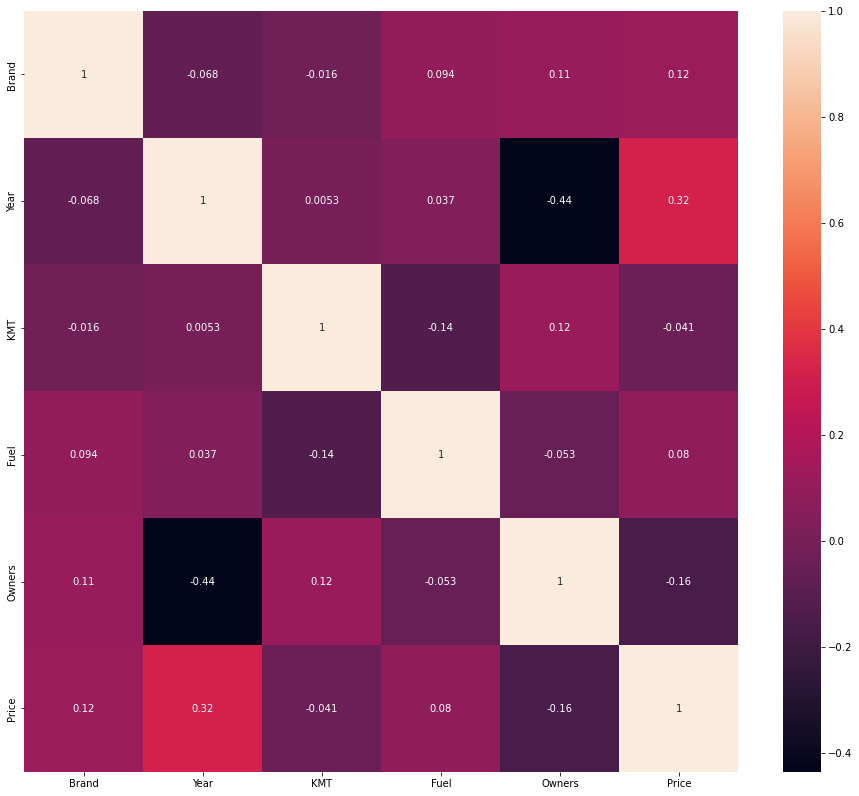

In [38]:
corr=df.corr()
plt.figure(figsize=(16,14))
sns.heatmap(corr,annot=True)
plt.show()

# OutliersRemoval

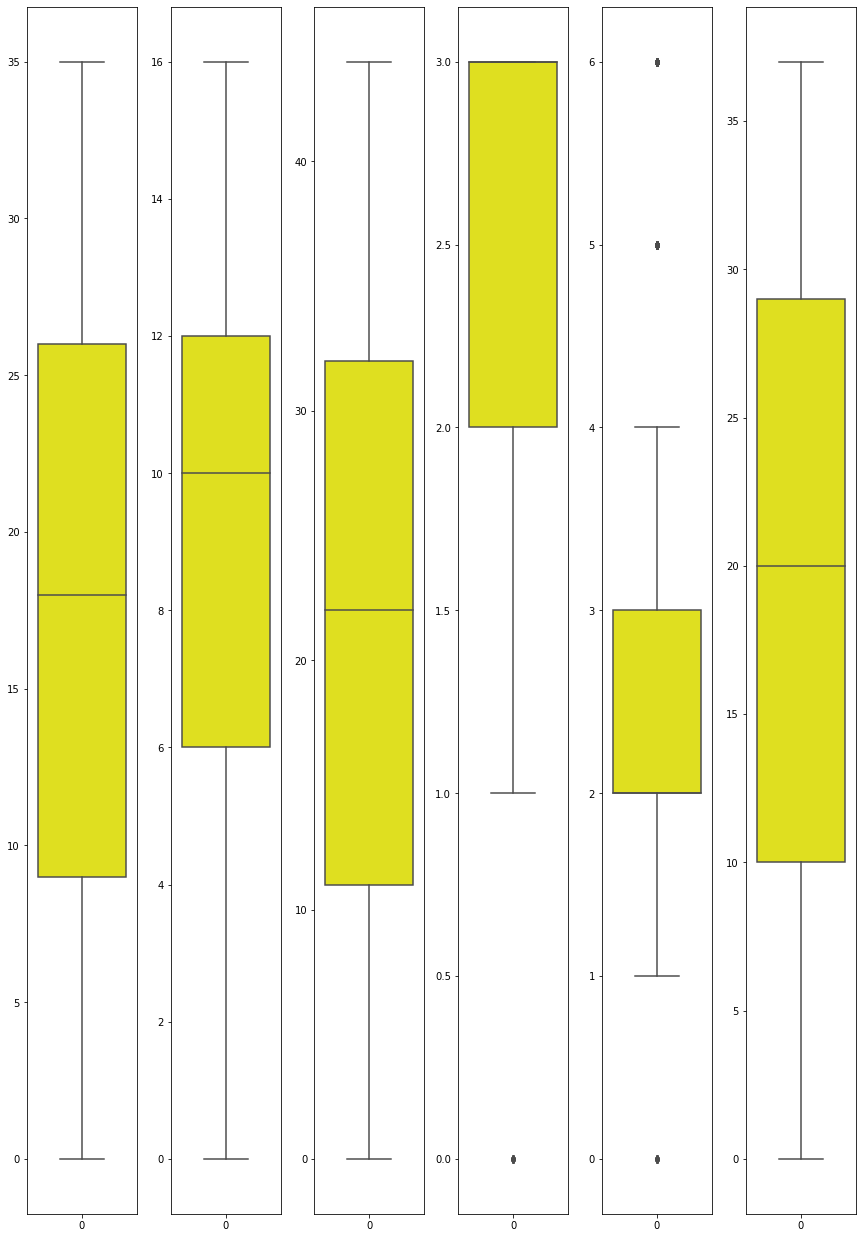

In [40]:
collist = df.columns.values
ncol=30
nrows=14
plt.figure(figsize=(2*ncol,8*ncol))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(data=df[collist[i]],color='yellow',orient='v')
    plt.tight_layout()

In [41]:
from scipy.stats import zscore
z=np.abs(zscore(df))

In [45]:
df1=df[(z<3).all(axis=1)]

In [46]:
df1.shape

(2235, 6)

In [47]:
df.shape

(2250, 6)

# Skewness

In [48]:
df1.skew()

Brand     0.009427
Year     -0.488759
KMT      -0.025973
Fuel     -0.625415
Owners    1.349841
Price    -0.135790
dtype: float64

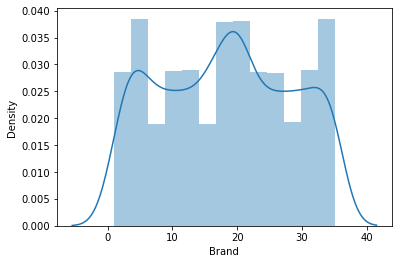

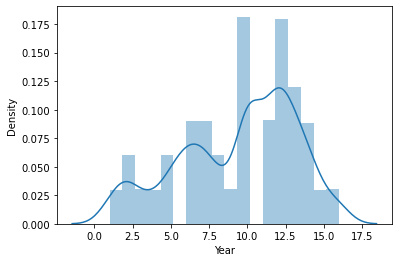

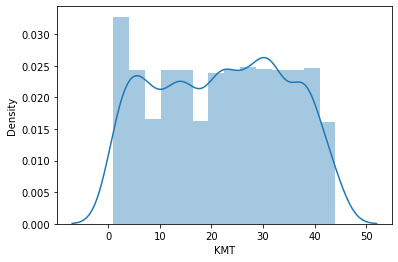

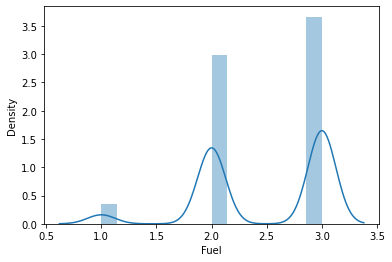

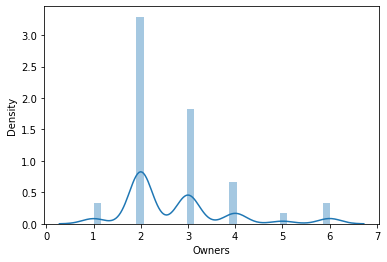

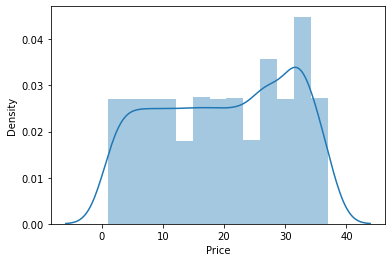

In [49]:
for i in df1:
    sns.distplot(df1[i])
    plt.show()

In [50]:
for i in df1.columns:
    
    # removing skewness using transformation method
    if df1.skew().loc[i]>0.5:
        df1[i]=np.log1p(df1[i])
        
        #we areusing square method to remove skewness
        if df1.skew().loc[i]<0.5:
            df1[i]=np.square(df1[i])

In [51]:
df1.skew()

Brand     0.009427
Year     -0.488759
KMT      -0.025973
Fuel     -0.625415
Owners    0.553298
Price    -0.135790
dtype: float64

# Spliting the data into Feature and Target

In [52]:
x=df.drop(columns='Price')
y=df['Price']

In [53]:
x.shape

(2250, 5)

In [54]:
y.shape

(2250,)

In [55]:
x.sample(10)

,Brand,Year,KMT,Fuel,Owners
1632,0.0,0.0,0.0,0,0
132,6.0,13.0,14.0,2,2
2181,25.0,9.0,44.0,2,3
2096,9.0,10.0,26.0,1,3
1151,20.0,12.0,13.0,3,2
456,9.0,10.0,26.0,1,3
1113,30.0,8.0,6.0,2,3
2150,21.0,10.0,21.0,1,2
1832,18.0,14.0,22.0,3,2
1549,2.0,12.0,19.0,2,2


# Preprocessing

In [56]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X=scaler.fit_transform(x)

In [63]:
from sklearn.linear_model import LinearRegression
LIN=LinearRegression()
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
maxAccu=0
maxRs=0
for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=.30,random_state=i)
    LIN.fit(x_train,y_train)
    pred=LIN.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRs=i

# Train and Test

In [64]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=177)

In [66]:
from sklearn import metrics

In [67]:
LIN=LinearRegression()
LIN.fit(x_train,y_train)

# prediction
predLIN=LIN.predict(x_test)
print('R2_Score:',r2_score(y_test,predLIN))

# Metric Evaluation
print('MAE:',metrics.mean_absolute_error(y_test, predLIN))
print('MSE:',metrics.mean_squared_error(y_test, predLIN))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, predLIN)))

R2_Score: 0.07550642919541195
MAE: 8.483958194144222
MSE: 111.27502688120184
RMSE: 10.54869787609835


In [69]:
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
pred=dtr.predict(x_test)
acc=r2_score(y_test,pred)
print(f"R2 score:{acc*100}%")

R2 score:100.0%


In [70]:
rfr=RandomForestRegressor()
rfr.fit(x_train,y_train)
pred=rfr.predict(x_test)
acc=r2_score(y_test,pred)
print(f"R2 score:{acc*100}%")

R2 score:99.97350045752688%


In [71]:
ls=Lasso()
ls.fit(x_train,y_train)
pred=ls.predict(x_test)
acc=r2_score(y_test,pred)
print(f"R2 score:{acc*100}%")

R2 score:8.044185758490796%


In [72]:
knn=KNeighborsRegressor()
knn.fit(x_train,y_train)
pred=knn.predict(x_test)
acc=r2_score(y_test,pred)

print(f"R2 Score: {acc*100}%")

R2 Score: 100.0%


# HyperParameterTuning

In [73]:
from sklearn.model_selection import GridSearchCV

In [74]:
parameter={'max_depth':[100,200,500,1000],
          'n_estimators':[10,100,500],
          'subsample':[0.001,0.01,0.1,1.0],
          'random_state':[50,100,200]}

In [75]:
GCV = GridSearchCV(GradientBoostingRegressor(),parameter,cv=5)

In [76]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'max_depth': [100, 200, 500, 1000],
                         'n_estimators': [10, 100, 500],
                         'random_state': [50, 100, 200],
                         'subsample': [0.001, 0.01, 0.1, 1.0]})

In [77]:
GCV.best_params_

{'max_depth': 100, 'n_estimators': 500, 'random_state': 50, 'subsample': 0.1}

In [78]:
car_price_final=GradientBoostingRegressor(max_depth=100, n_estimators=500, random_state=50, subsample=1.0)
car_price_final.fit(x_train,y_train)
pred=car_price_final.predict(x_test)
acc=r2_score(y_test,pred)
print(acc*100)

100.0


# ModelSaving

In [79]:
import joblib
joblib.dump(car_price_final,'Used_Car_price_prediction.pkl')

['Used_Car_price_prediction.pkl']